# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid=b8d1097d7b51c6868aa9ef418d0fafea"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | prince rupert
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | katabu
Processing Record 7 of Set 1 | egilsstadir
Processing Record 8 of Set 1 | chui
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | ta`u
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | laela
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | kristiansund
Processing Record 18 of Set 1 | burang
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | filingue
Processing Record 22 of Set 1 | fedorovka
Processing Recor

Processing Record 38 of Set 4 | maloye ganyushkino
Processing Record 39 of Set 4 | lerwick
Processing Record 40 of Set 4 | west island
Processing Record 41 of Set 4 | el calafate
Processing Record 42 of Set 4 | cadale
Processing Record 43 of Set 4 | kavali
Processing Record 44 of Set 4 | revda
Processing Record 45 of Set 4 | veydelevka
Processing Record 46 of Set 4 | huarmey
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | faya-largeau
Processing Record 49 of Set 4 | sur
Processing Record 0 of Set 5 | rikaze
Processing Record 1 of Set 5 | alacranes
Processing Record 2 of Set 5 | labrador city
Processing Record 3 of Set 5 | askoy
Processing Record 4 of Set 5 | kabalo
Processing Record 5 of Set 5 | bure
Processing Record 6 of Set 5 | papatowai
Processing Record 7 of Set 5 | chonchi
Processing Record 8 of Set 5 | north bend
Processing Record 9 of Set 5 | tobelo
Processing Record 10 of Set 5 | san ignacio de velasco
Processing Record 11 of Set 5 | namsos
Processing R

Processing Record 30 of Set 8 | parkes
Processing Record 31 of Set 8 | bandon
Processing Record 32 of Set 8 | bonthe
Processing Record 33 of Set 8 | randazzo
Processing Record 34 of Set 8 | bom jesus
Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | newman
Processing Record 37 of Set 8 | scarborough
Processing Record 38 of Set 8 | sabzevar
Processing Record 39 of Set 8 | kapenguria
Processing Record 40 of Set 8 | wewak
Processing Record 41 of Set 8 | nar'yan-mar
Processing Record 42 of Set 8 | nacozari de garcia
Processing Record 43 of Set 8 | remire-montjoly
Processing Record 44 of Set 8 | monte carmelo
Processing Record 45 of Set 8 | neftcala
Processing Record 46 of Set 8 | whitecourt
Processing Record 47 of Set 8 | tiruppuvanam
Processing Record 48 of Set 8 | narrabri
Processing Record 49 of Set 8 | codajas
Processing Record 0 of Set 9 | saint-pierre
Processing Record 1 of Set 9 | greenville
Processing Record 2 of Set 9 | geraldton
Processing Record 3 of Set 9 |

Processing Record 23 of Set 12 | orchard homes
Processing Record 24 of Set 12 | vakhsh
Processing Record 25 of Set 12 | westport
Processing Record 26 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 27 of Set 12 | ji'an
Processing Record 28 of Set 12 | phek
Processing Record 29 of Set 12 | port augusta
Processing Record 30 of Set 12 | lady frere
Processing Record 31 of Set 12 | jayapura
Processing Record 32 of Set 12 | mount isa
Processing Record 33 of Set 12 | stenungsund
Processing Record 34 of Set 12 | sishilichengzi
City not found. Skipping...
Processing Record 35 of Set 12 | lake havasu city
Processing Record 36 of Set 12 | baie-comeau
Processing Record 37 of Set 12 | evanston
Processing Record 38 of Set 12 | dali
Processing Record 39 of Set 12 | jaca
Processing Record 40 of Set 12 | kotma
Processing Record 41 of Set 12 | ar rutbah
Processing Record 42 of Set 12 | kattivakkam
Processing Record 43 of Set 12 | habiganj
Processing Record 44 of Set 12 | gobabis
Proce

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,65.86,51,0,5.30,US,1697551226
1,prince rupert,54.3161,-130.3201,53.69,66,100,13.80,CA,1697551226
2,hawaiian paradise park,19.5933,-154.9731,70.03,95,1,1.36,US,1697551227
3,grytviken,-54.2811,-36.5092,36.12,88,100,8.99,GS,1697551010
4,college,64.8569,-147.8028,36.90,78,100,1.01,US,1697551228


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,65.86,51,0,5.30,US,1697551226
1,prince rupert,54.3161,-130.3201,53.69,66,100,13.80,CA,1697551226
2,hawaiian paradise park,19.5933,-154.9731,70.03,95,1,1.36,US,1697551227
3,grytviken,-54.2811,-36.5092,36.12,88,100,8.99,GS,1697551010
4,college,64.8569,-147.8028,36.90,78,100,1.01,US,1697551228


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

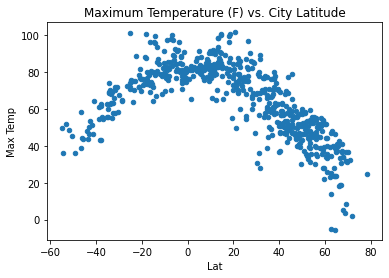

In [25]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
latit_vs_Temp_axes = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", 
                                      title="Maximum Temperature (F) vs. City Latitude")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

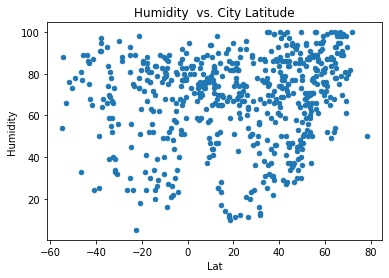

In [27]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
latit_vs_Hum_axes = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", 
                                      title="Humidity  vs. City Latitude")

latit_vs_Hum_axes.get_figure().savefig("output_data/Temp_vs_Humidity_All_Cities.png")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

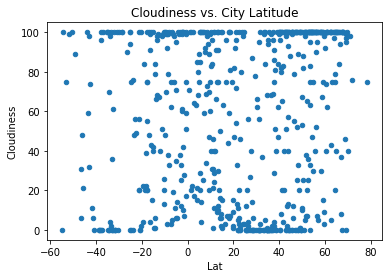

In [29]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
latit_vs_Cloudiness_axes = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                                      title="Cloudiness vs. City Latitude")

latit_vs_Hum_axes.get_figure().savefig("output_data/Lat_vs_Cloudiness_All_Cities.png")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

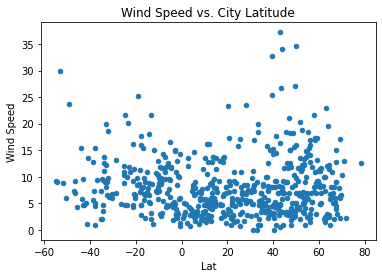

In [30]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
latit_vs_wind_axes = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
                                      title="Wind Speed vs. City Latitude")

latit_vs_Hum_axes.get_figure().savefig("output_data/Lat_vs_Wind_All_Cities.png")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    correlation = stats.pearsonr(x_values, y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,65.86,51,0,5.30,US,1697551226
1,prince rupert,54.3161,-130.3201,53.69,66,100,13.80,CA,1697551226
2,hawaiian paradise park,19.5933,-154.9731,70.03,95,1,1.36,US,1697551227
4,college,64.8569,-147.8028,36.90,78,100,1.01,US,1697551228
6,egilsstadir,65.2653,-14.3948,37.42,98,100,6.22,IS,1697551229


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df = southern_hemi_df.dropna()
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,36.12,88,100,8.99,GS,1697551010
5,katabu,-4.9333,122.5167,77.02,81,6,6.24,ID,1697551229
7,chui,-33.6971,-53.4616,63.48,55,100,13.69,UY,1697551230
8,waitangi,-43.9535,-176.5597,47.82,89,100,15.46,NZ,1697551230
9,blackmans bay,-43.0167,147.3167,46.53,85,32,4.74,AU,1697551231


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7349027901103075
The correlation between both factors is -0.86


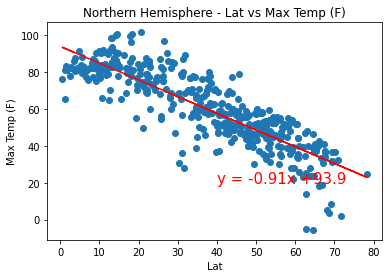

In [60]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
from scipy import stats
from scipy.stats import linregress
x_values = northern_hemi_df["Lat"].values
y_values = northern_hemi_df["Max Temp"].values
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(40, 20))

The r-squared is: 0.6642936574085094
The correlation between both factors is 0.82


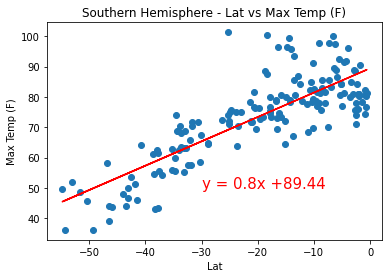

In [61]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"].values
y_values = southern_hemi_df["Max Temp"].values
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Southern",(-30, 50))

**Discussion about the linear relationship:** The Northern hemisphere has a negative correlation with the the maximum temperature whereas in the Southern hemosphere there is a positive correlation with maximum temperature 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.034699798655117846
The correlation between both factors is 0.19


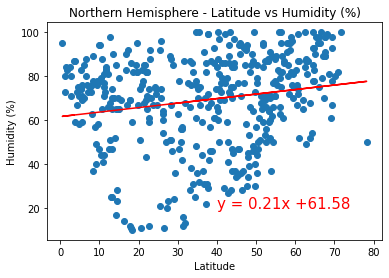

In [62]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Humidity'].values
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

The r-squared is: 0.00944431371442123
The correlation between both factors is -0.1


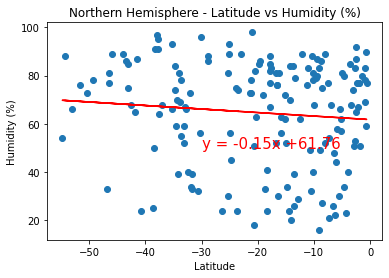

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Humidity'].values
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(-30, 50))

**Discussion about the linear relationship:** There is no correlation between humidity and maximum temperature in Northern or Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04817029590672763
The correlation between both factors is 0.22


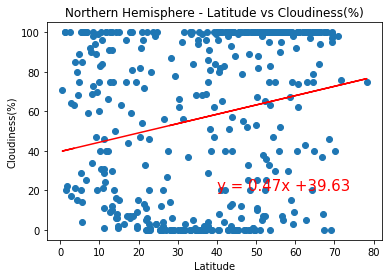

In [65]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Cloudiness'].values
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(40, 20))

The r-squared is: 0.012739587323292346
The correlation between both factors is 0.11


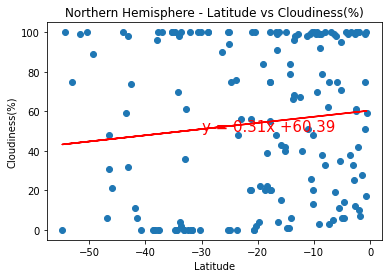

In [66]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Cloudiness'].values
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(-30, 50))

**Discussion about the linear relationship:** There no correlation between Cloudiness and maximum temperature in Northern or Southern Hemisphere. Perhaps a slight positive correlation for Northern hemisphere and a slight negative correlation for Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0283648020342905
The correlation between both factors is 0.17


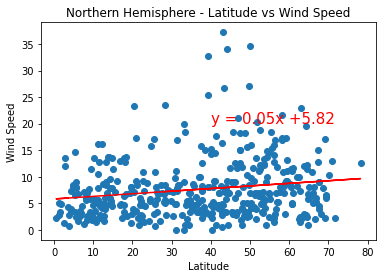

In [68]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Wind Speed'].values
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed", "Northern",(40, 20))

The r-squared is: 0.017559530157269236
The correlation between both factors is -0.13


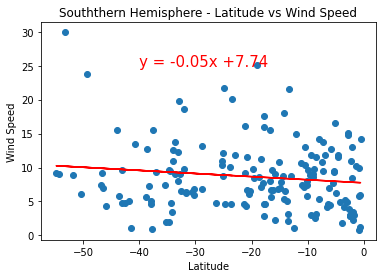

In [70]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Wind Speed'].values
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed", "Souththern",(-40, 25))

**Discussion about the linear relationship:** There is no correlation between wind speed and maximum temperature in Northern or Southern Hemisphere